In [64]:
import pandas as pd
import numpy as np
import math
import random
import cv2
import os
from sklearn.model_selection import train_test_split
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

## Import CSV

In [65]:
data = pd.read_csv('dataset/raw/train.csv')

In [66]:
data.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [67]:
data.shape

(364, 2)

## EDA

In [68]:
labels = data['target'].unique()
labels

array(['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak',
       'sattriya', 'kuchipudi', 'mohiniyattam'], dtype=object)

In [69]:
path = os.path.join('dataset', 'raw', 'train')
if(len(os.walk(path).__next__()[2]) == 364):
    print('No mismatch in number of files in csv and inside folder')

No mismatch in number of files in csv and inside folder


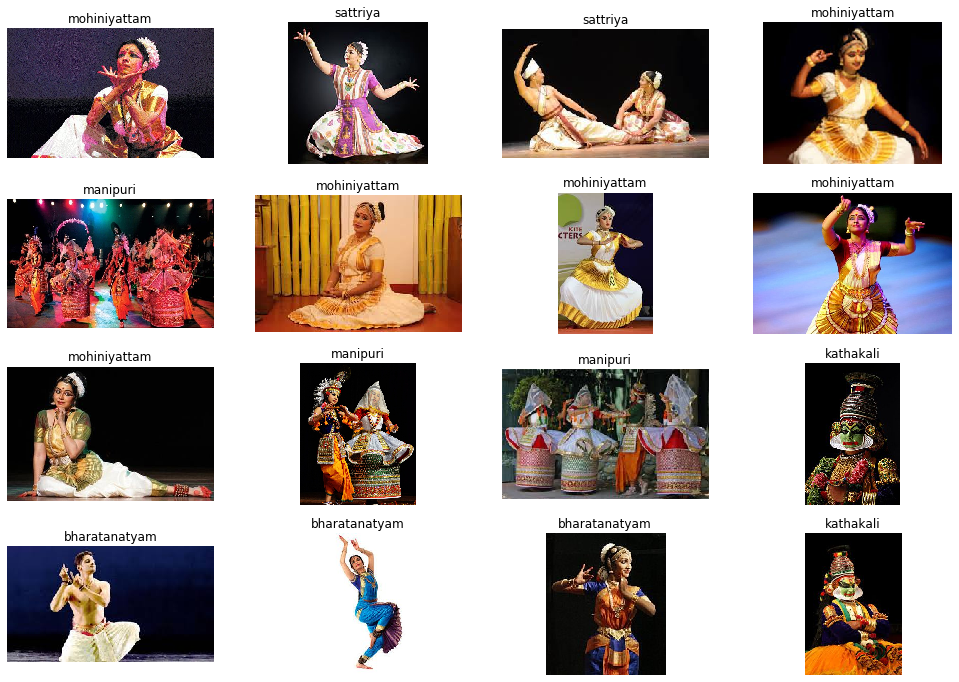

In [70]:
plt.figure(figsize = (17,12))
#image_no = math.floor(np.random() * (364 - 2 + 1) + 2)
image_no = random.randint(1,364)
for n in range(16):
    ax = plt.subplot(4,4,n+1)
    image_path = os.path.join('dataset', 'raw', 'train', data['Image'].iloc[image_no])
    image = cv2.imread(image_path)
    plt.axis('off')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(data['target'].iloc[image_no])
    image_no = random.randint(2,364)

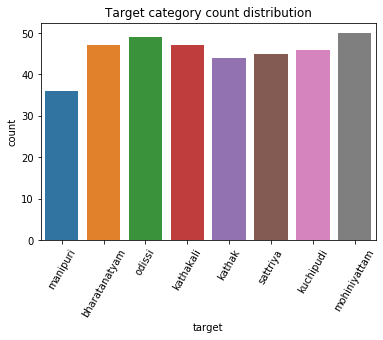

In [71]:
sns.countplot(data['target'])
plt.title('Target category count distribution')
plt.xticks(rotation = 60)
plt.show()

### Train - Validation Split

In [72]:
train,test,_ ,_ = train_test_split(data, data['target'], random_state = 123, test_size = 0.12, train_size = 0.88)

In [83]:
print('No. of images for training:   ',train.shape[0])
print('No. of images for validation: ',test.shape[0])

No. of images for training:    320
No. of images for validation:  44


## Create dataset directories

In [77]:
parent = 'dataset/prepared/'
leaf1 = 'Training'
leaf2 = 'Validation'
path1 = os.path.join(parent,leaf1)
path2 = os.path.join(parent,leaf2)

def create_Paths (path, labels):
    for label in labels:
        new_path = os.path.join(path, label)
        if(os.path.isdir(new_path) == False):
            os.mkdir(new_path)

create_Paths(path1, labels)
create_Paths(path2, labels)

## Copying raw dataset images to respective directory

In [78]:
origin_dir = 'dataset/raw/train/'
dest_dir = 'dataset/prepared/Training/'

filecount=0
for idx in range(train.shape[0]):
    origin_file = os.path.join(origin_dir, train['Image'].iloc[idx])
    dest_file = os.path.join(os.path.join(dest_dir, train['target'].iloc[idx]), train['Image'].iloc[idx])
    copyfile(origin_file, dest_file)
    filecount+=1
print(str(filecount) + ' files transferred')

320 files transferred


In [79]:
origin_dir = 'dataset/raw/train/'
dest_dir = 'dataset/prepared/Validation/'

filecount=0
for idx in range(test.shape[0]):
    origin_file = os.path.join(origin_dir, test['Image'].iloc[idx])
    dest_file = os.path.join(os.path.join(dest_dir, test['target'].iloc[idx]), test['Image'].iloc[idx])
    copyfile(origin_file, dest_file)
    filecount+=1
print(str(filecount) + ' files transferred')

44 files transferred


## Flush files from directory

In [60]:
def flush_dataset(path):
    for filename in os.listdir(path):
        file_path = os.path.join(path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

In [76]:
flush_dataset('dataset/prepared/Training/')
flush_dataset('dataset/prepared/Validation')